# **Proposta de Trabalho - Mineração de dados - Fase 3**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Raul Araju Korogi Oliveira e Gabriel Limas Nunes
### **Matrículas:**  2021032110 e 2021032048


### **Tema:** Saúde Fetal
### **Base de dados:** https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/


**Todas as células que não possuem comentários que indiquem ter sido criadas manualmente ou alteradas, foram geradas através de iterações com o ChatGPT, com mudanças muito pequenas como nomes de variáveis.**

## **Chat Utilizado para Fase 3:** 

**Business Understanding:** https://chat.openai.com/share/b10b7265-2e9e-4771-b49b-4a6ead8e1490 

**Data Understanding:** https://chat.openai.com/share/3018b34d-82e7-4788-ad22-95971cb117e7

**Data Preparation:** https://chat.openai.com/share/08db44b2-c426-4eac-97e4-5704d2dbd50f

**Modeling:** https://chat.openai.com/share/a0a5ea61-004d-4605-9eca-b2a28e0af42d

**Evaluation** https://chat.openai.com/share/a9db60c6-074d-424c-a633-e2857f3468af

## Imports

In [1]:
#Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils import resample
from scipy.stats import sem, t, ttest_rel
from sklearn.decomposition import PCA

In [2]:
warnings.simplefilter(action='ignore')

## **2. Data understanding (Entendimento dos dados)**


#### Carregar csv

In [3]:
#Carregando a base de dados
df = pd.read_csv('./fetal_health.csv', delimiter=',', encoding='utf-8')

#### Explorar o Dataframe

In [4]:
'''
###CODIGO ORIGINAL
df.head()
'''

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
'''
###CODIGO ORIGINAL
print(df.info())
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

#### Entendimento do Alvo

Prompt:
gostaria que você fizesse um histograma com a contagem de cada label, que são 1,2 ou 3 da classe alvo fetal_health

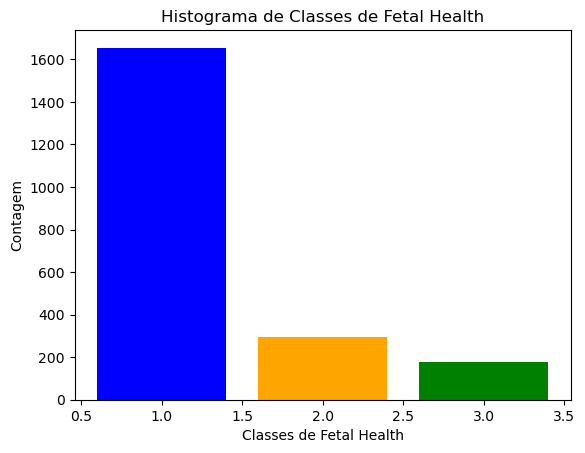

In [6]:
'''
###CODIGO ORIGINAL
sns.countplot(x='fetal_health', data=df)
plt.title('Distribuição de Classes')
plt.show()
'''

# Contagem de cada classe na coluna 'fetal_health'
count_classes = df['fetal_health'].value_counts()

# Criar um histograma
plt.bar(count_classes.index, count_classes.values, color=['blue', 'orange', 'green'])

# Adicionar rótulos e título
plt.xlabel('Classes de Fetal Health')
plt.ylabel('Contagem')
plt.title('Histograma de Classes de Fetal Health')

# Mostrar o histograma
plt.show()

#### Estatísticas Descritivas

In [7]:
'''
###CODIGO ORIGINAL
print(df.describe())
'''

df.describe()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


#### Matriz de Correlação

Prompt: agora gere uma matriz de correlação para os atributos do meu dataset

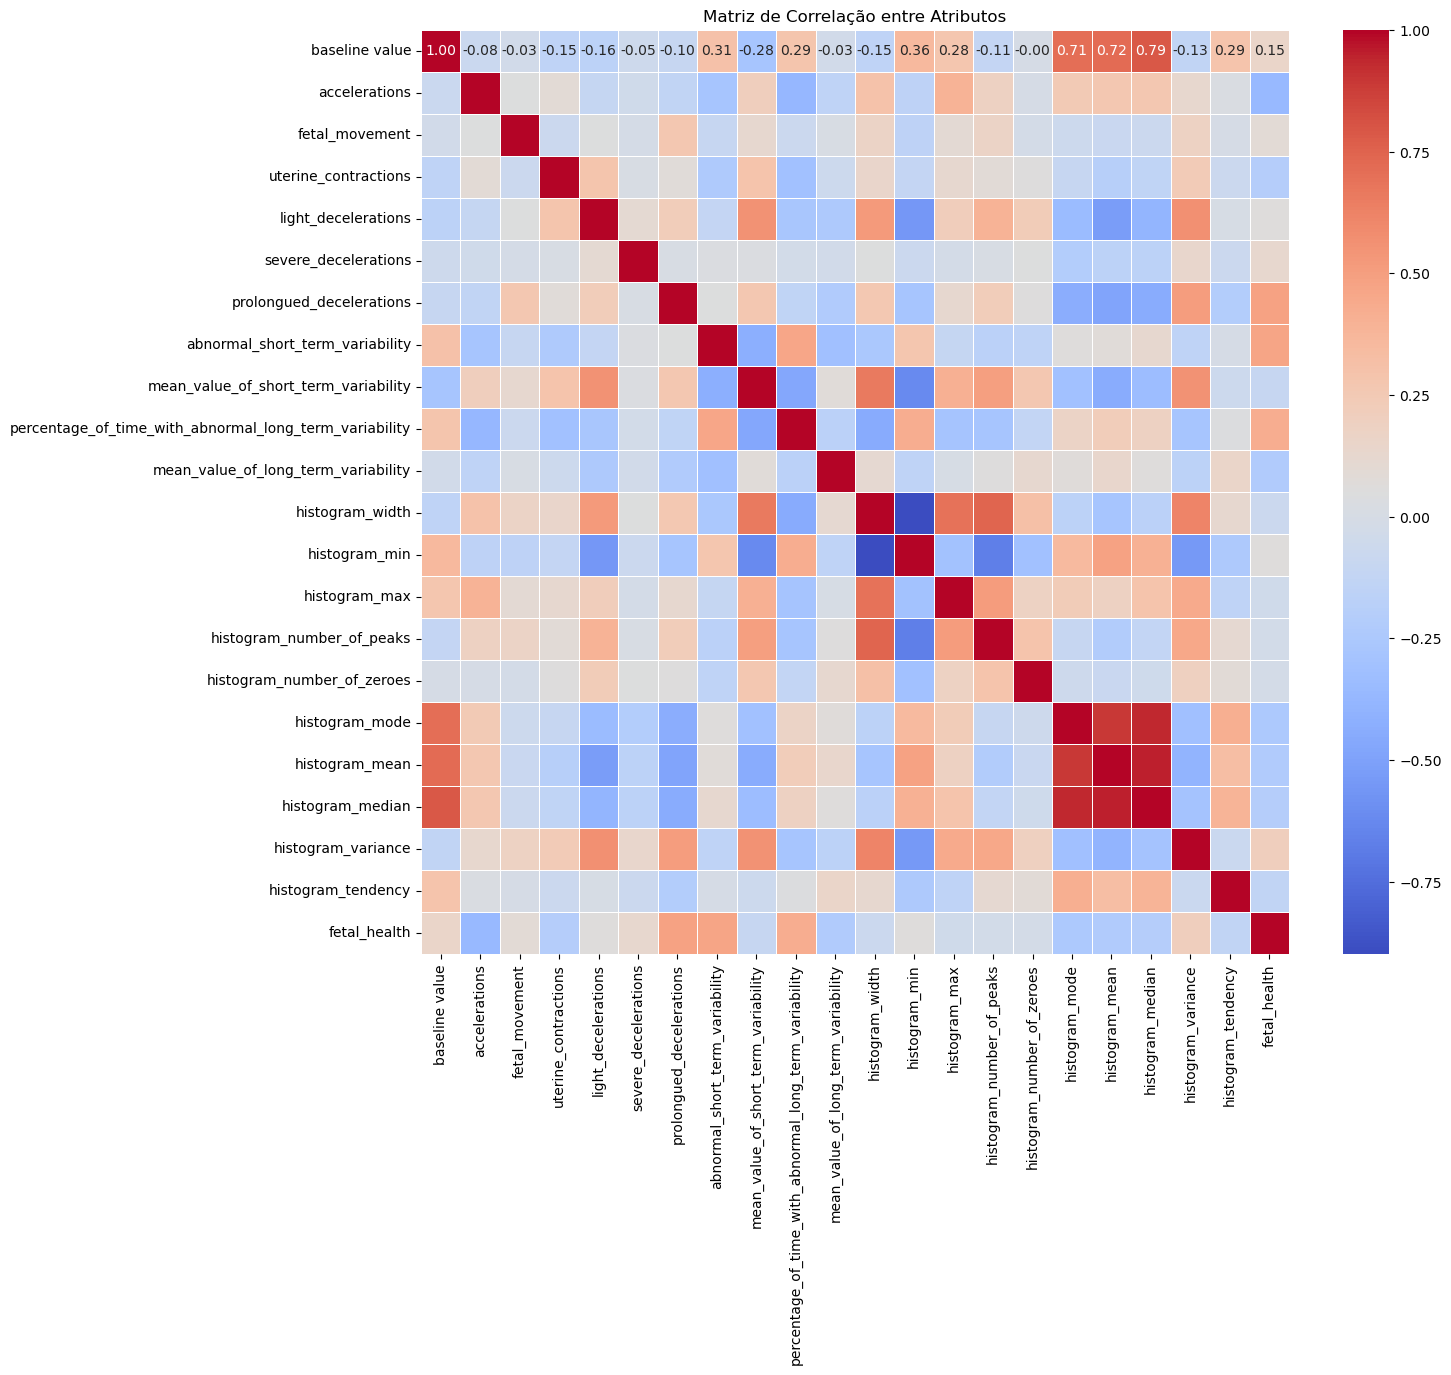

In [8]:
'''
###CODIGO ORIGINAL
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()
'''


# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Criar um mapa de calor usando Seaborn
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Atributos')
plt.show()

#### Análise de Variáveis Relacionadas ao Ritmo Cardíaco Fetal

prompt: faça um pair plot das seguintes colunas 'baseline value', 'accelerations', 'light_decelerations', 'severe_decelerations'

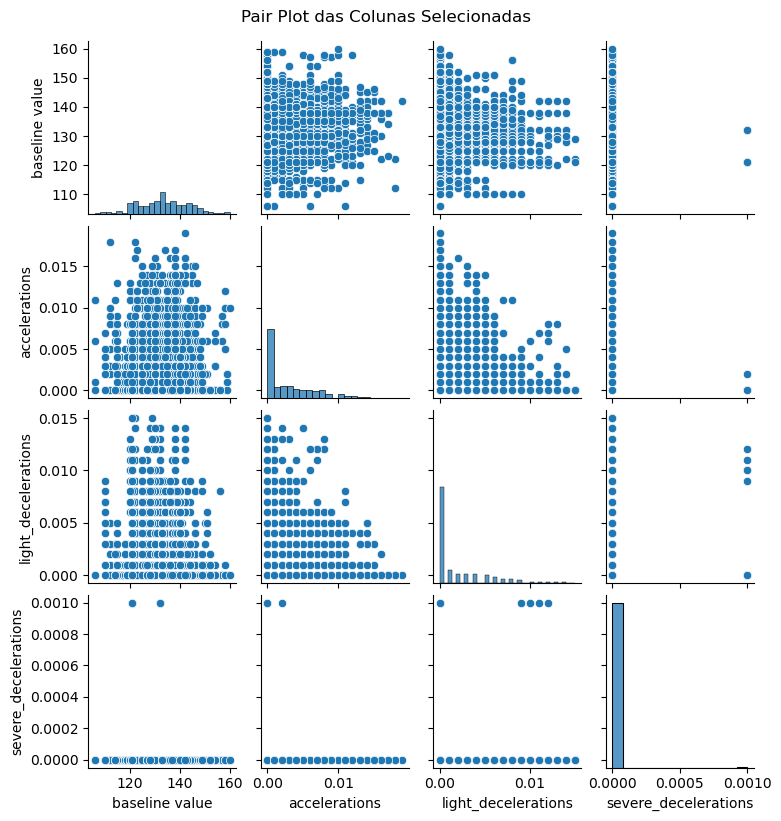

In [9]:
'''
###CODIGO ORIGINAL
fhr_variables = ['baseline value', 'accelerations', 'light_decelerations', 'severe_decelerations']
sns.pairplot(df, hue='fetal_health', vars=fhr_variables)
plt.show()
'''

# Selecionar colunas específicas
columns_of_interest = ['baseline value', 'accelerations', 'light_decelerations', 'severe_decelerations']

# Criar o pair plot
sns.pairplot(df[columns_of_interest], height=2)
plt.suptitle('Pair Plot das Colunas Selecionadas', y=1.02)
plt.show()

#### Análise de Variáveis de Variabilidade

prompt: faça boxplots dos atributos ligados a variabilidade em curto prazo

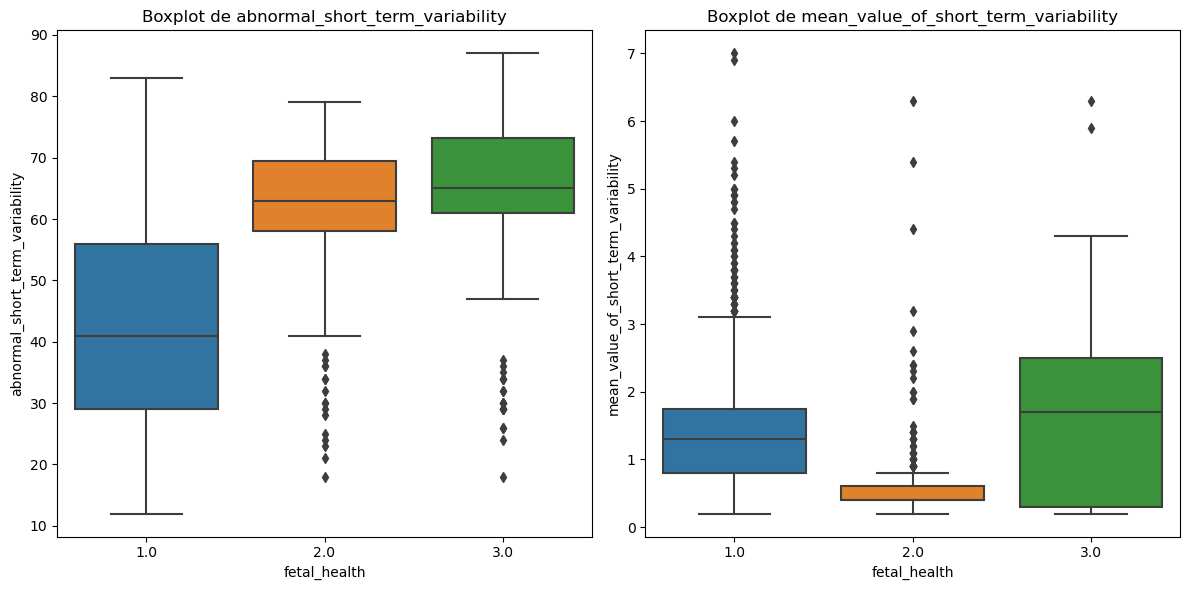

In [10]:
'''
###CODIGO ORIGINAL
variability_variables = ['abnormal_short_term_variability', 'mean_value_of_short_term_variability']
sns.boxplot(x='fetal_health', y='abnormal_short_term_variability', data=df)
plt.title('Boxplot da Variabilidade de Curto Prazo por Classe')
plt.show()

sns.boxplot(x='fetal_health', y='mean_value_of_short_term_variability', data=df)
plt.title('Boxplot da Média da Variabilidade de Curto Prazo por Classe')
plt.show()
'''

# Selecionar colunas relacionadas à variabilidade em curto prazo
short_term_variability_columns = [
    'abnormal_short_term_variability',
    'mean_value_of_short_term_variability'
]

# Criar boxplots
plt.figure(figsize=(12, 6))

for i, column in enumerate(short_term_variability_columns, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='fetal_health', y=column, data=df)
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

#### Análise de Variáveis de Histograma

prompt: agora os boxplots dos atributos ligados a histograma

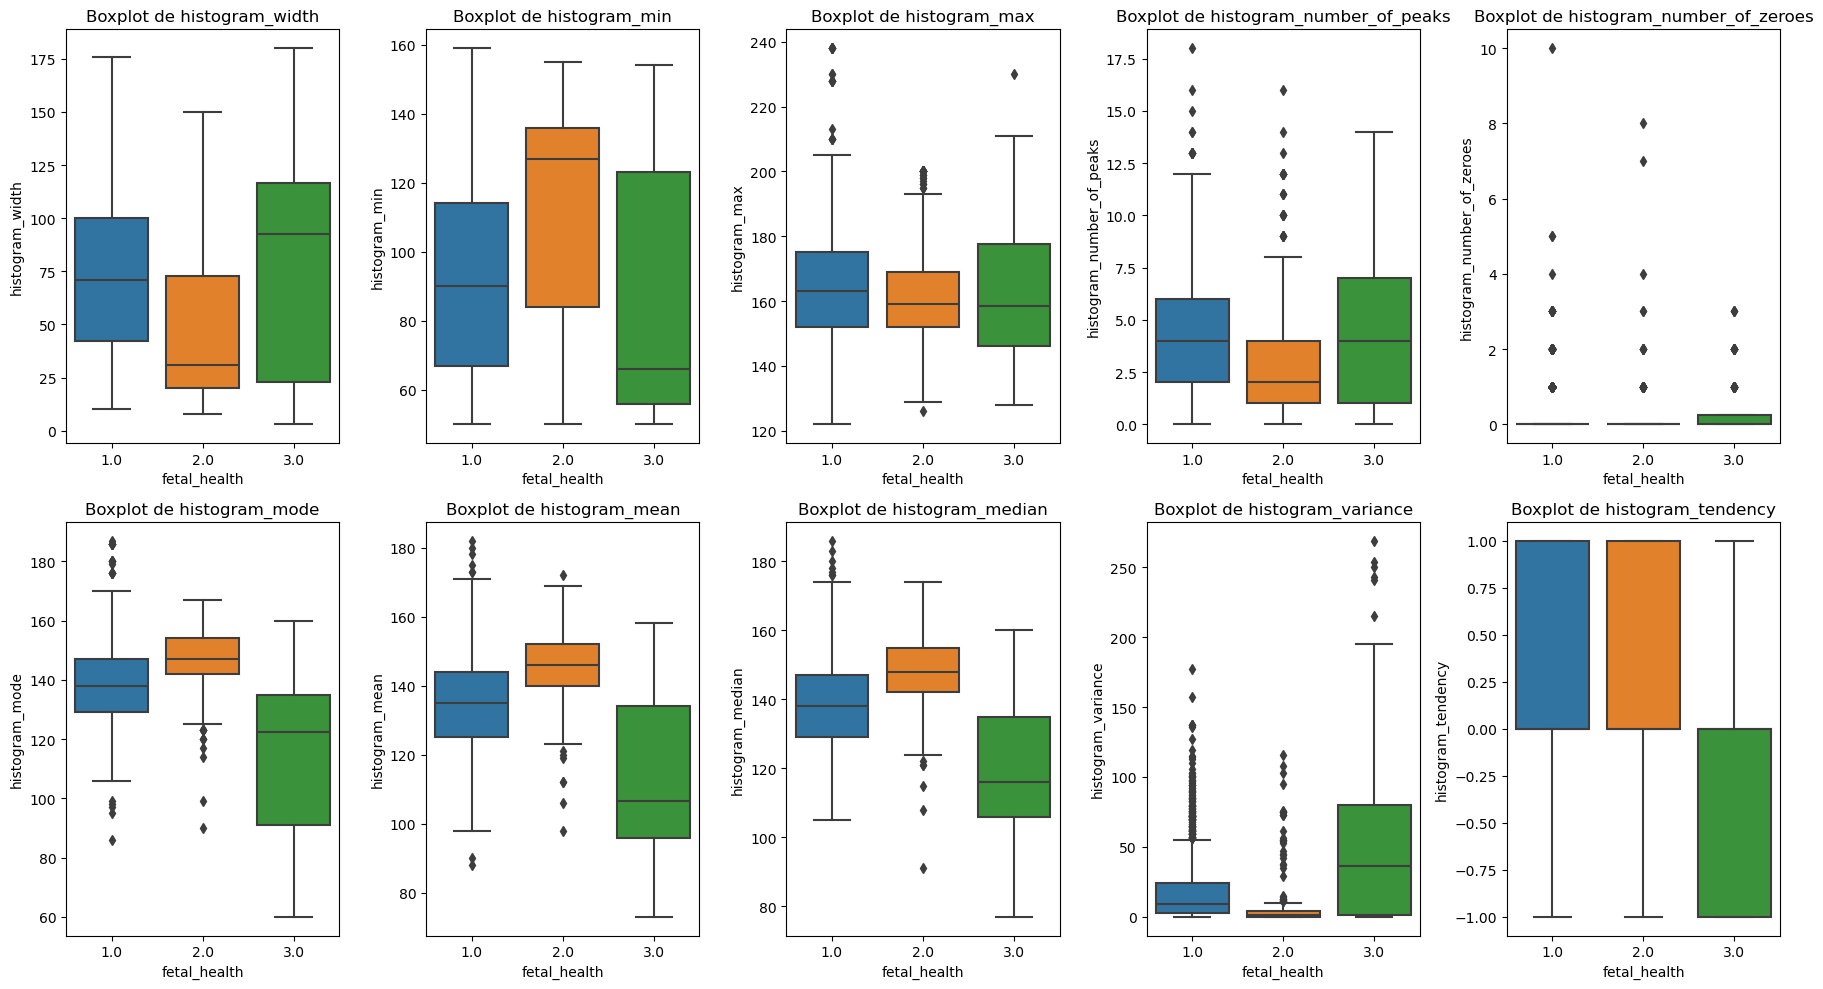

In [11]:
'''
###CODIGO ORIGINAL
histogram_variables = ['histogram_width', 'histogram_mode', 'histogram_mean']
sns.boxplot(x='fetal_health', y='histogram_width', data=df)
plt.title('Boxplot da Largura do Histograma por Classe')
plt.show()

sns.boxplot(x='fetal_health', y='histogram_mode', data=df)
plt.title('Boxplot do Modo do Histograma por Classe')
plt.show()

sns.boxplot(x='fetal_health', y='histogram_mean', data=df)
plt.title('Boxplot do Média do Histograma por Classe')
plt.show()
'''

histogram_columns = [
    'histogram_width',
    'histogram_min',
    'histogram_max',
    'histogram_number_of_peaks',
    'histogram_number_of_zeroes',
    'histogram_mode',
    'histogram_mean',
    'histogram_median',
    'histogram_variance',
    'histogram_tendency'
]

# Criar boxplots
plt.figure(figsize=(18, 10))

for i, column in enumerate(histogram_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x='fetal_health', y=column, data=df)
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

#### Análise de Tendências

prompt: agora somente da tendencia do histograma

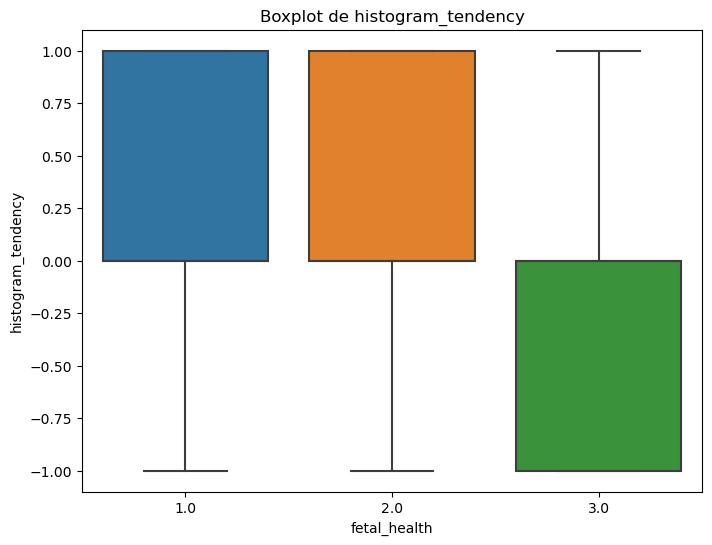

In [12]:
'''
###CODIGO ORIGINAL
sns.boxplot(x='fetal_health', y='histogram_tendency', data=df)
plt.title('Distribuição da Tendência do Histograma por Classe')
plt.show()
'''

# Selecionar coluna relacionada à tendência do histograma
histogram_tendency_column = 'histogram_tendency'

# Criar boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='fetal_health', y=histogram_tendency_column, data=df)
plt.title(f'Boxplot de {histogram_tendency_column}')
plt.show()

## **3. Data preparation (Preparação dos dados)**

#### Tratamento de Dados Ausentes

prompt: primeiro quero codigo que conta o número de valores nulos em cada atributo

In [13]:
'''
###CODIGO ORIGINAL
print(df.isnull().sum())
'''

# Conte o número de valores nulos em cada atributo
num_missing_values = df.isnull().sum()

# Exiba os resultados
print("Número de valores nulos em cada atributo:")
print(num_missing_values)

Número de valores nulos em cada atributo:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                

#### Visualização de Outliers

prompt: gostaria agora de codigo para visualização de outliers, plotando boxplots pra todos os atributos em subplots

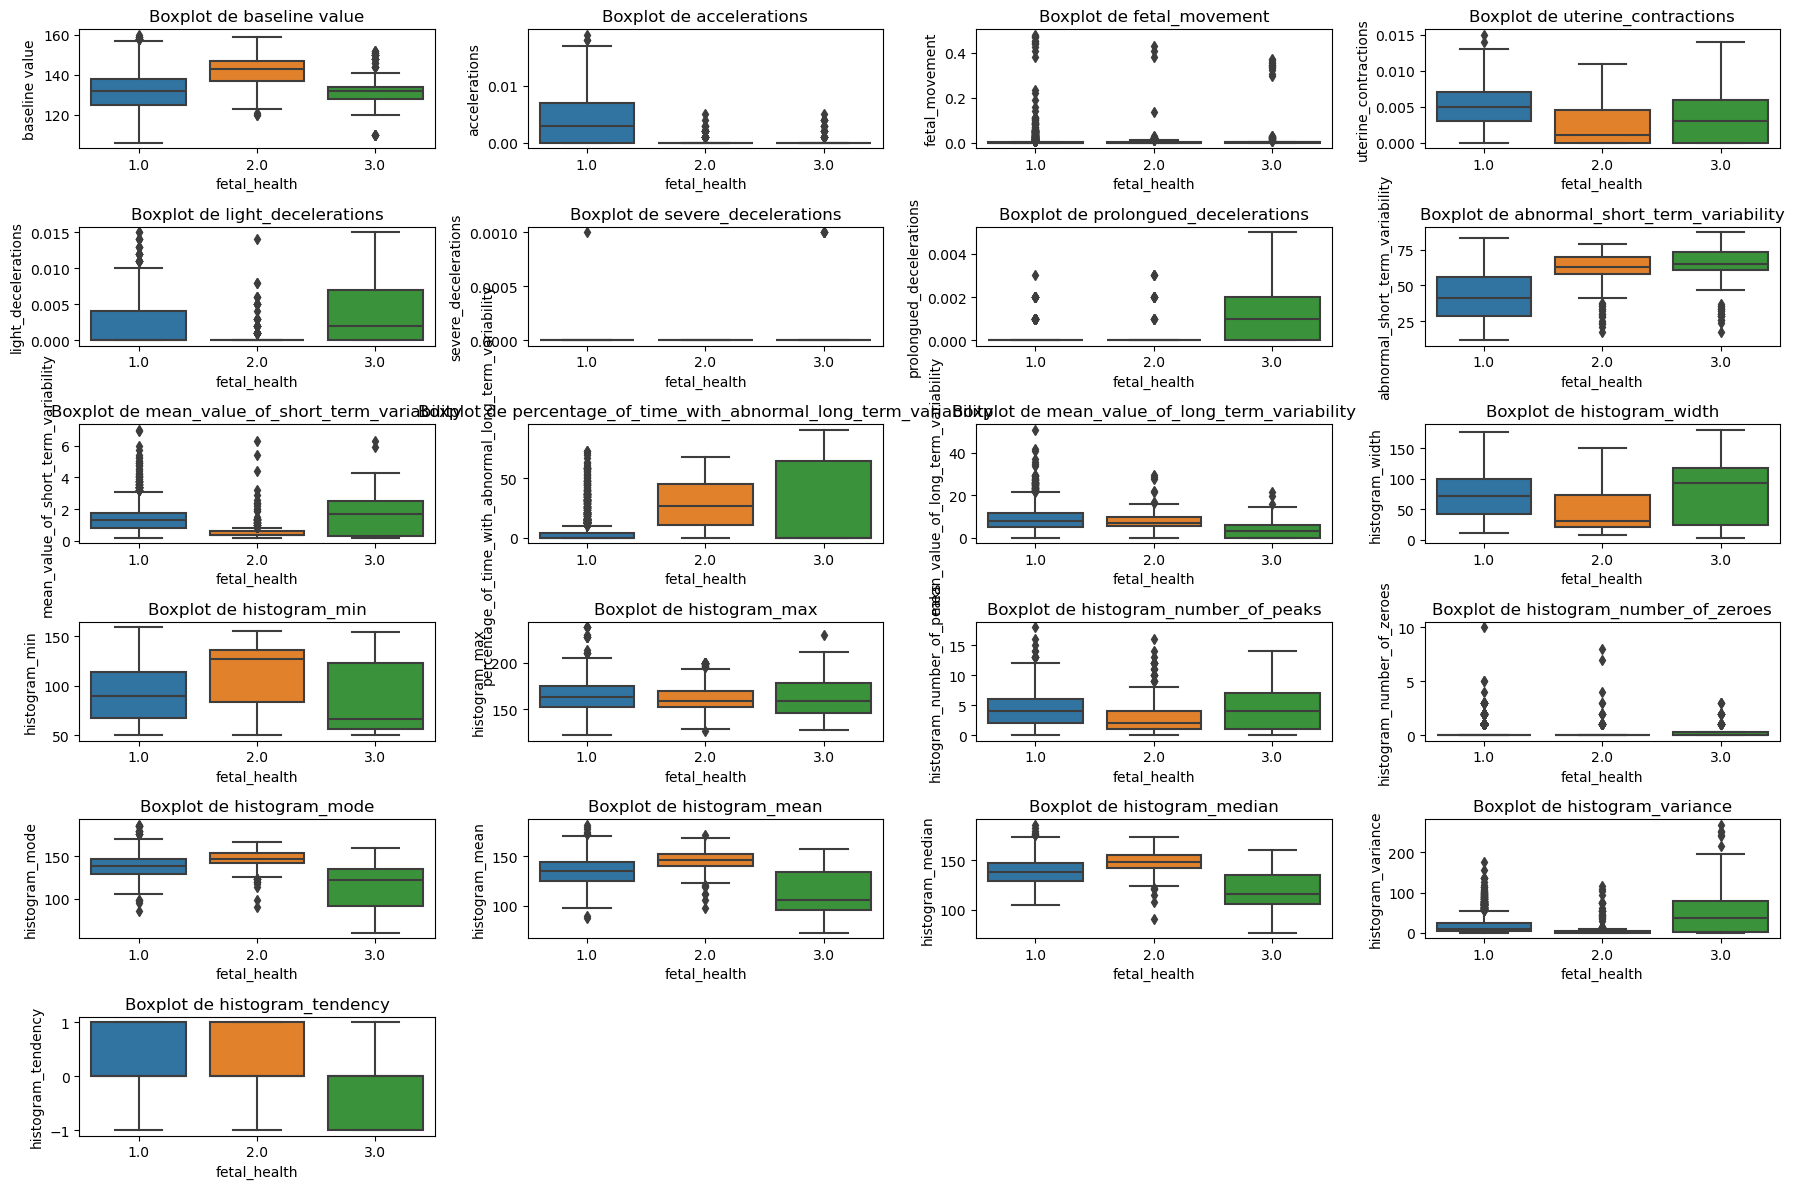

In [14]:
'''
###CODIGO ORIGINAL
plt.figure(figsize=(20, 15))

# Crie subplots (6, 4) para cada coluna
for i, column in enumerate(df.columns):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot para a coluna: {column}')

# Ajuste o layout para evitar sobreposição de títulos
plt.tight_layout()
plt.show()
'''

# Configuração do tamanho do plot
plt.figure(figsize=(18, 12))

# Loop através de cada atributo para criar subplots
for i, column in enumerate(df.columns[:-1]):  # Excluímos a última coluna (fetal_health) que é a classe
    plt.subplot(6, 4, i + 1)  # 5 linhas, 4 colunas de subplots
    sns.boxplot(x='fetal_health', y=column, data=df)
    plt.title(f'Boxplot de {column}')

# Ajustes de layout
plt.tight_layout()
plt.show()


prompt: agora repita o mesmo plot fazendo plots de violino em vez de boxplots

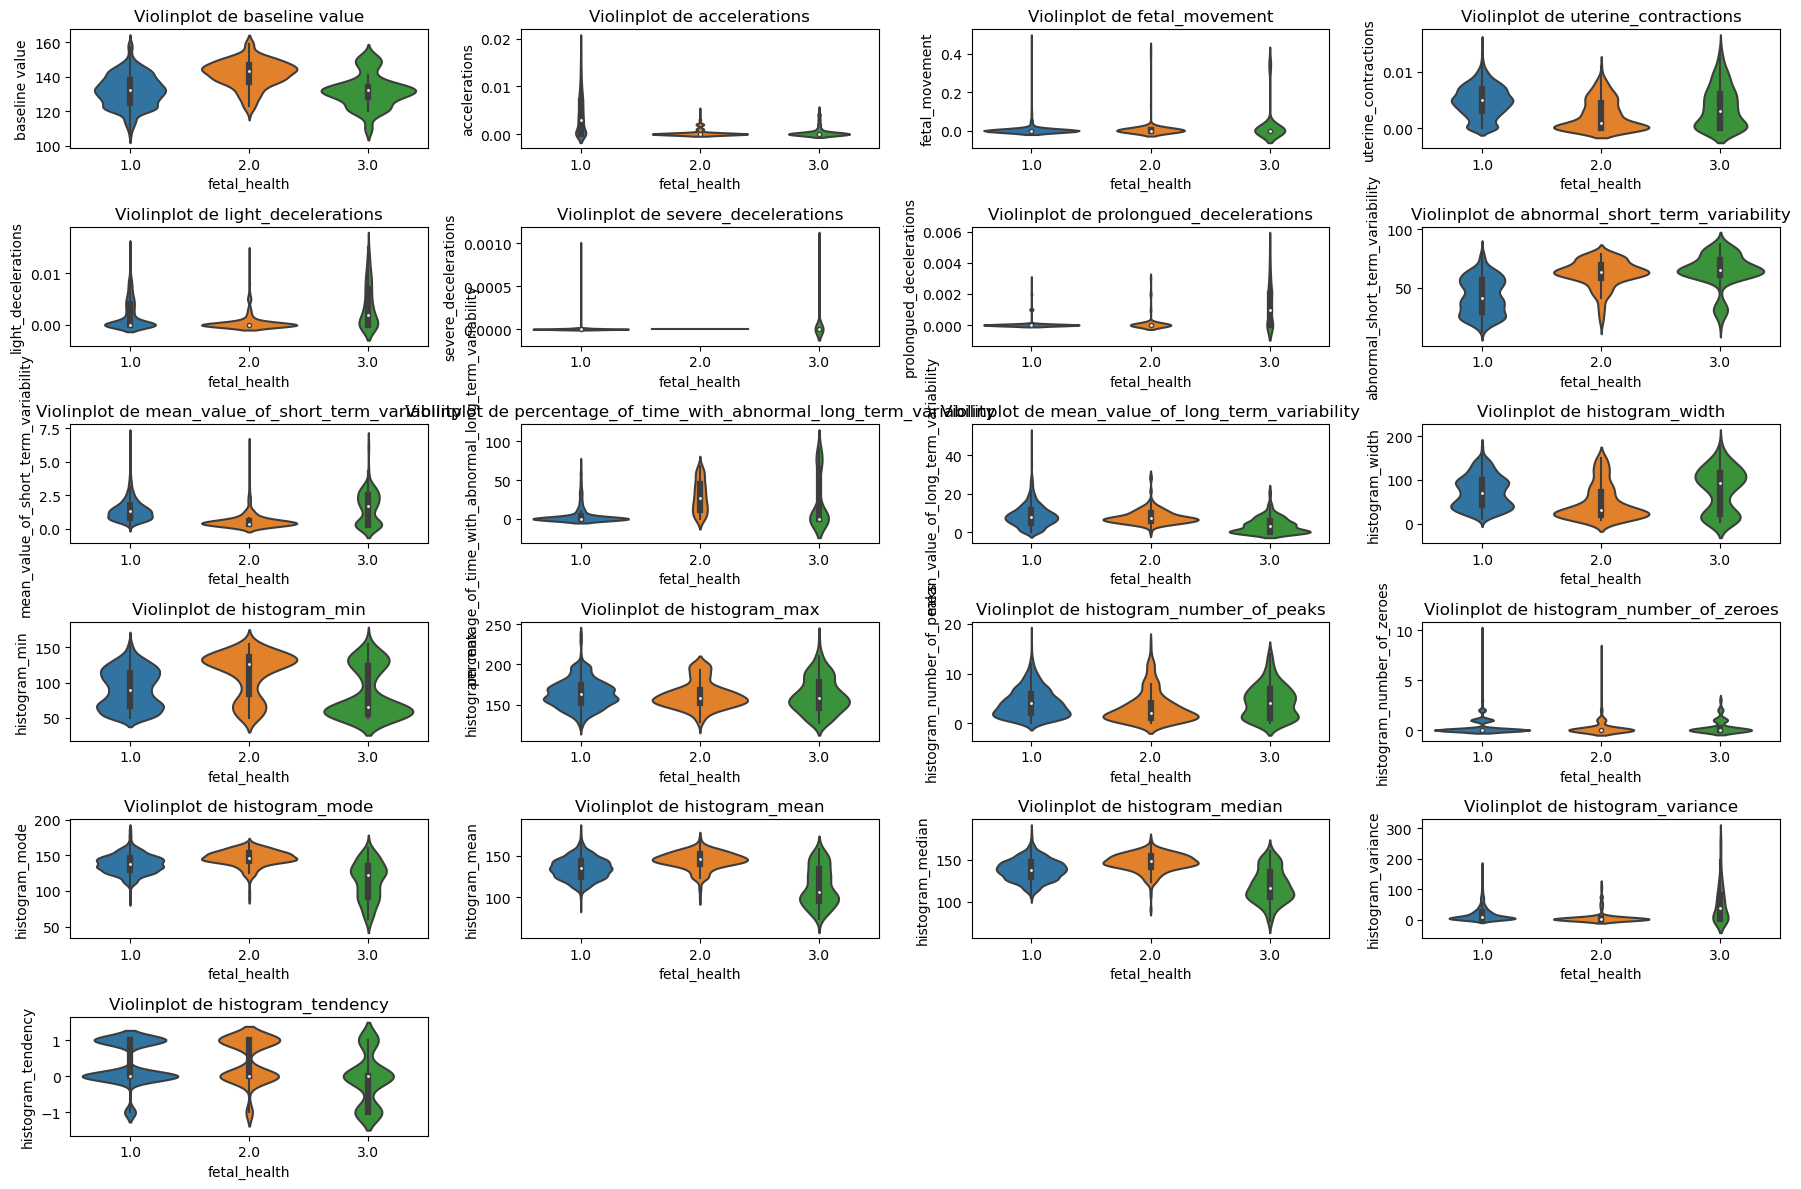

In [15]:
'''
###CODIGO ORIGINAL
# Ajuste o tamanho da figura conforme necessário
plt.figure(figsize=(20, 15))

# Itera sobre cada coluna e cria um subplot com um gráfico de violino para cada classe
for i, column in enumerate(df.columns[:-1]):  # Ignorando a coluna de classe
    plt.subplot(6, 4, i + 1)
    sns.violinplot(x='fetal_health', y=column, data=df, palette='Set2')
    plt.title(f'Distribuição de {column} por Classe')

# Ajusta o layout para evitar sobreposição de títulos
plt.tight_layout()
plt.show()
'''

# Configuração do tamanho do plot
plt.figure(figsize=(18, 12))

# Loop através de cada atributo para criar subplots
for i, column in enumerate(df.columns[:-1]):  # Excluímos a última coluna (fetal_health) que é a classe
    plt.subplot(6, 4, i + 1)  # 5 linhas, 4 colunas de subplots
    sns.violinplot(x='fetal_health', y=column, data=df)
    plt.title(f'Violinplot de {column}')

# Ajustes de layout
plt.tight_layout()
plt.show()

#### Normalização

prompt: agora quero fazer a normalização dos meus dados usando Standard Scaler

In [16]:
'''
###CODIGO ORIGINAL
# Inicialize o scaler
scaler = StandardScaler()

# Ajuste e transforme os dados
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
'''
# Selecione apenas as colunas numéricas para normalização (excluindo a coluna 'fetal_health')
cols_to_normalize = df.columns[:-1]  # Excluímos a última coluna ('fetal_health')

# Crie uma cópia dos dados para não modificar o DataFrame original
df_normalized = df.copy()

# Inicialize o StandardScaler
scaler = StandardScaler()

# Ajuste e transforme os dados usando o StandardScaler nas colunas selecionadas
df_normalized[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Visualize os primeiros registros do DataFrame normalizado
print(df_normalized.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0       -1.352220      -0.822388        -0.20321             -1.482465   
1       -0.132526       0.730133        -0.20321              0.554627   
2       -0.030884      -0.046128        -0.20321              1.233657   
3        0.070757      -0.046128        -0.20321              1.233657   
4       -0.132526       0.988886        -0.20321              1.233657   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0            -0.638438             -0.057476                 -0.268754   
1             0.375243             -0.057476                 -0.268754   
2             0.375243             -0.057476                 -0.268754   
3             0.375243             -0.057476                 -0.268754   
4            -0.638438             -0.057476                 -0.268754   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                         1.513190

#### Balanceamento de Classes

Foi analisado o efeito do uso de métodos de balanceamento de classe sugeridos pelo ChatGPT, com o objetivo de criar número igual de amostras de cada uma das classes e desse modo adquirir previsões mais precisas. Mas os resultados foram negativos em comparação ao dataset não balanceado, desse modo foi descartada essa estratégia.

prompt: faça o baçanceamento do meu dataset

In [17]:
'''
###CODIGO ORIGINAL
# Verifique o balanceamento atual
print("Contagem de classes antes do balanceamento:", Counter(df['fetal_health']))

# Aplique SMOTE para balancear as classes
smote = SMOTE()
X,y=df.drop('fetal_health', axis=1), df['fetal_health']
X_resampled, y_resampled = smote.fit_resample(X,y)

# Verifique o balanceamento após o balanceamento
print("Contagem de classes após o balanceamento:", Counter(y_resampled))
'''

from imblearn.over_sampling import RandomOverSampler

# Supondo que 'df' seja o DataFrame original
X = df.drop('fetal_health', axis=1)  # Features
y = df['fetal_health']  # Variável de destino

# Inicialize o RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Aplique o oversampling aos dados
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Crie um novo DataFrame com os dados balanceados
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='fetal_health')], axis=1)

# Visualize a distribuição das classes após o balanceamento
print(df_balanced['fetal_health'].value_counts())

fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64


#### PCA

prompt: agora gostaria que você aplicasse o PCA no meu dataset e gere um grafico pra ele

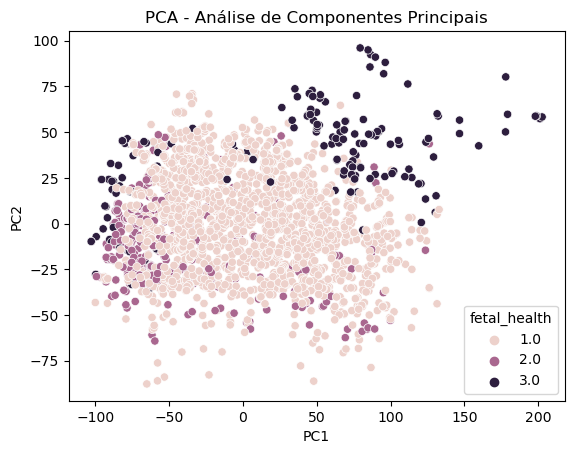

In [18]:
'''
###CODIGO ORIGINAL
pca = PCA()
X_pca = pca.fit_transform(X)


# Choose the number of components based on the plot or a desired threshold
# For example, if 95% of variance is explained, set n_components=0.95
n_components = 2  # Replace with your desired number of components

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA components and labels
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['label'] = y

# Plot the data in the reduced-dimensional space
plt.figure(figsize=(10, 6))
for label in y.unique():
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)

plt.xlabel(f'Principal Component 1\n({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2\n({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('PCA')
plt.legend()
plt.show()
'''


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' seja o DataFrame original
X = df.drop('fetal_health', axis=1)  # Features
y = df['fetal_health']  # Variável de destino

# Inicialize o PCA com o número de componentes desejado
num_components = 2  # Número de componentes principais
pca = PCA(n_components=num_components)

# Ajuste e transforme os dados
X_pca = pca.fit_transform(X)

# Crie um DataFrame com os componentes principais e a variável de destino
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
df_pca['fetal_health'] = y

# Plote um gráfico de dispersão dos componentes principais
sns.scatterplot(x='PC1', y='PC2', hue='fetal_health', data=df_pca)
plt.title('PCA - Análise de Componentes Principais')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Divisão dos Dados

prompt: divida meu dataset em teste e treino com 20% para teste

In [19]:
'''
###CODIGO ORIGINAL
from sklearn.model_selection import train_test_split
#Sem balanceamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

# Supondo que 'df' seja o DataFrame original
X = df.drop('fetal_health', axis=1)  # Features
y = df['fetal_health']  # Variável de destino

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize o número de instâncias em cada conjunto
print("Número de instâncias no conjunto de treinamento:", len(X_train))
print("Número de instâncias no conjunto de teste:", len(X_test))

Número de instâncias no conjunto de treinamento: 1700
Número de instâncias no conjunto de teste: 426


#### Seleção de Características

prompt: utilizando RFE faça codigo que seleciona as principais caracteristicas relevantes para utilizar na minha analise

In [20]:
'''
###CODIGO ORIGINAL
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Inicialize o modelo
model = LogisticRegression()

# Inicialize o seletor de características
rfe = RFE(model, n_features_to_select=10)

# Ajuste o seletor aos dados
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)
'''

'\n###CODIGO ORIGINAL\nfrom sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\n\n# Inicialize o modelo\nmodel = LogisticRegression()\n\n# Inicialize o seletor de características\nrfe = RFE(model, n_features_to_select=10)\n\n# Ajuste o seletor aos dados\nX_train_selected = rfe.fit_transform(X_train, y_train)\nX_test_selected = rfe.transform(X_test)\n'

In [21]:
'''
###CODIGO ORIGINAL
# Obtenha os índices das características selecionadas
selected_feature_indices = rfe.support_

# Obtenha os nomes das características selecionadas
selected_feature_names = X_train.columns[selected_feature_indices]

# Mostre os nomes das características selecionadas
print("Características Selecionadas:")
print(selected_feature_names)
'''
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Supondo que 'df' seja o DataFrame original
X = df.drop('fetal_health', axis=1)  # Features
y = df['fetal_health']  # Variável de destino

# Inicialize o classificador SVM
svm = SVC(kernel='linear')

# Inicialize o RFE com o classificador SVM
rfe = RFE(estimator=svm, n_features_to_select=5)  # Escolha o número desejado de características

# Ajuste o RFE ao conjunto de treinamento
X_rfe = rfe.fit_transform(X, y)

# Visualize as características selecionadas
selected_features = X.columns[rfe.support_]
print("Características Selecionadas:", selected_features)

Características Selecionadas: Index(['accelerations', 'fetal_movement', 'uterine_contractions',
       'mean_value_of_short_term_variability', 'histogram_number_of_zeroes'],
      dtype='object')


## **4. Modeling (Modelagem)**

### Funções auxiliares

In [22]:
model_results = {}

### Naive Bayes

prompt: Crie um modelo Naive Bayes para o meu dataframe

In [23]:
'''
###CODIGO ORIGINAL
# Crie e treine o modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Faça previsões
predictions = nb_model.predict(X_test)

# # Avalie o desempenho do modelo
model_results['Naive Bayes'] = (y_test, predictions)
'''

from sklearn.metrics import accuracy_score

# Criação e treinamento do modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predição no conjunto de teste
Y_pred_nb = nb_model.predict(X_test)

# Armazenamento dos resultados no dicionário
model_results['Naive Bayes'] = (y_test, Y_pred_nb)

# Avaliação do modelo Naive Bayes
accuracy = accuracy_score(y_test, Y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.8028169014084507


### Árvore de Decisão

prompt: agora arvore de decisao

In [24]:
'''
###CODIGO ORIGINAL
# Crie e treine o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Faça previsões
predictions = dt_model.predict(X_test)
model_results['Decision Tree'] = (y_test, predictions)
'''

# Criação e treinamento do modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predição no conjunto de teste
Y_pred_dt = dt_model.predict(X_test)

# Armazenamento dos resultados no dicionário
model_results['Decision Tree'] = (y_test, Y_pred_dt)

# Avaliação do modelo de Árvore de Decisão
accuracy = accuracy_score(y_test, Y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.9225352112676056


### Linear Discriminant Analysis

prompt: agora LDA

In [25]:
'''
###CODIGO ORIGINAL
# Crie e treine o modelo LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Faça previsões
predictions = lda_model.predict(X_test)
model_results['LDA'] = (y_test, predictions)
'''

# Criação e treinamento do modelo LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predição no conjunto de teste
Y_pred_lda = lda_model.predict(X_test)

# Armazenamento dos resultados no dicionário
model_results['LDA'] = (y_test, Y_pred_lda)

# Avaliação do modelo LDA
accuracy = accuracy_score(y_test, Y_pred_lda)
print("Accuracy:", accuracy)

Accuracy: 0.8826291079812206


### Support Vector Machine

prompt: agora SVM

In [26]:
'''
###CODIGO ORIGINAL
# Crie e treine o modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Faça previsões
predictions = svm_model.predict(X_test)
model_results['SVM'] = (y_test, predictions)
'''

# Criação e treinamento do modelo SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predição no conjunto de teste
Y_pred_svm = svm_model.predict(X_test)

# Armazenamento dos resultados no dicionário
model_results['SVM'] = (y_test, Y_pred_svm)

# Avaliação do modelo SVM
accuracy = accuracy_score(y_test, Y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.8568075117370892


In [27]:

clasifiers = [nb_model, dt_model, lda_model, svm_model]


# **Resultados Experimentais e Análise**

## **5. Evaluation (Validação)**


### Computar métricas

prompt: gostaria que você fizesse uma função model_info(y_test, predictions, model_name) que recebe esses parâmetros e imprime acuracia, precisao,  recall, f1_score e uma matriz de confusão em porcentagens

In [28]:
'''
###CODIGO ORIGINAL
def model_info(y_test, predictions, model_name):
    # Avalie o desempenho do modelo
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    # Converta a matriz de confusão para porcentagens
    conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Imprima métricas
    print(f'-------- {model_name} --------')
    print(f'Acurácia: {accuracy}')
    print(f'Precisão: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print(f'Relatório de Classificação:\n{class_report}')

    # Visualize a matriz de confusão
    plt.figure(figsize=(8, 6))
    #Porcentagem
    sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Normal', 'Suspeito', 'Patológico'], yticklabels=['Normal', 'Suspeito', 'Patológico'], cbar_kws={'label': 'Porcentagem'})
    plt.title(f'Matriz de Confusão: {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()
'''

def model_info(y_test, predictions, model_name):
    # Calcula as métricas
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    
    # Cria a matriz de confusão
    cm = confusion_matrix(y_test, predictions)
    
    # Calcula a matriz de confusão em porcentagem
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Imprime as métricas
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    
    # Imprime a matriz de confusão em porcentagem usando Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Normal", "Suspected", "Pathological"], yticklabels=["Normal", "Suspected", "Pathological"])
    plt.title("Confusion Matrix (Percentage)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Model: Naive Bayes
Accuracy: 80.28%
Precision: 86.98%
Recall: 80.28%
F1 Score: 82.05%


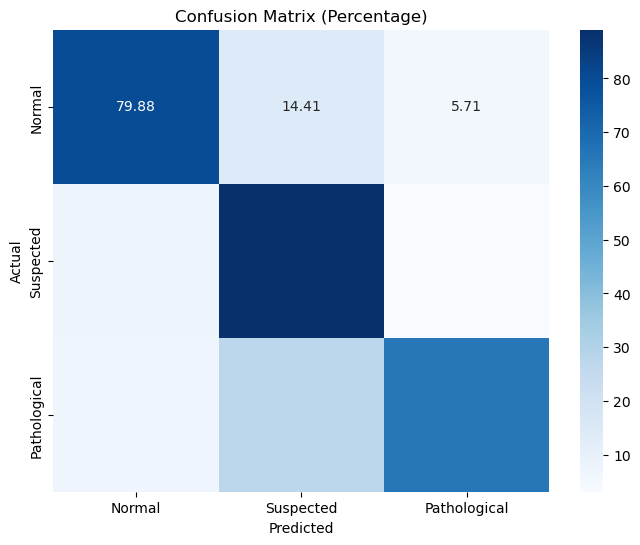

Model: Decision Tree
Accuracy: 92.25%
Precision: 92.49%
Recall: 92.25%
F1 Score: 92.35%


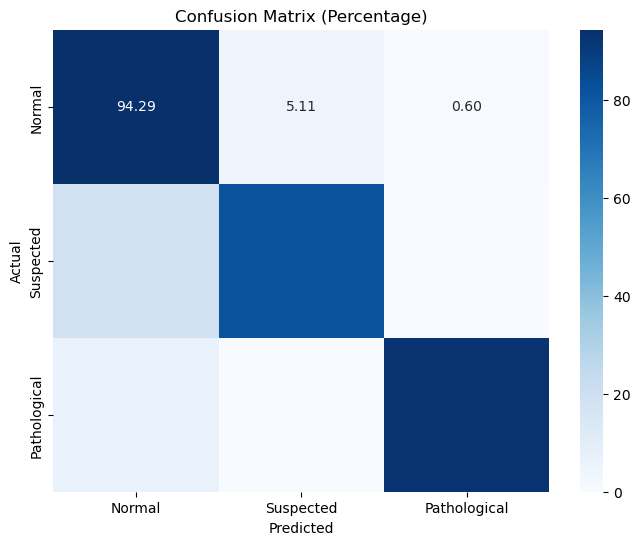

Model: LDA
Accuracy: 88.26%
Precision: 88.44%
Recall: 88.26%
F1 Score: 88.21%


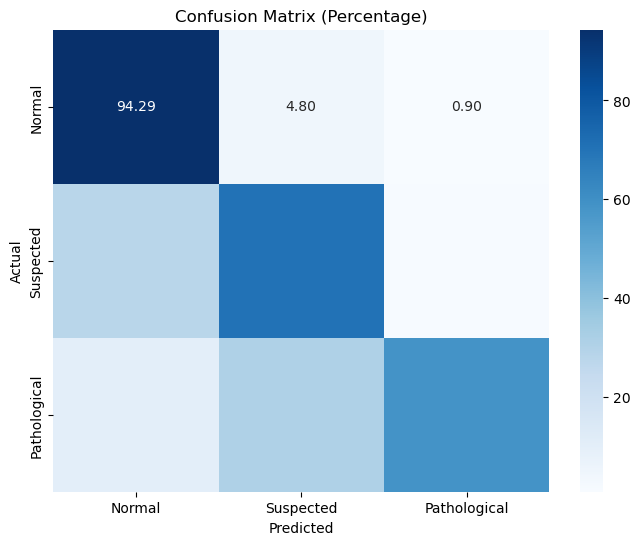

Model: SVM
Accuracy: 85.68%
Precision: 84.19%
Recall: 85.68%
F1 Score: 84.38%


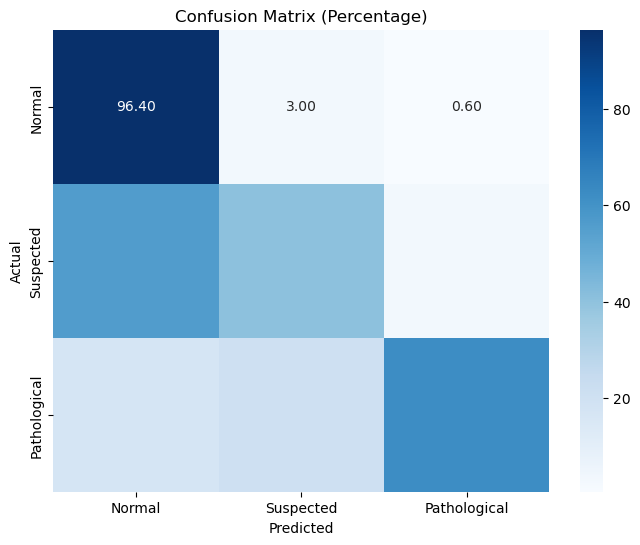

In [29]:
# INÍCIO CODIGO MANUAL
for key, value in model_results.items():
    model_info(value[0], value[1], key)
# FIM CODIGO MANUAL

### Cross Validation

prompt: agora faça uma função de crossvalidation cross_validation(classifier, X, y, k = 5, scoring = "accuracy"): usando kfold que imprime o nome do classifier, e a metrica com sua media e o desvio padrao

In [30]:
'''
###CODIGO ORIGINAL
def cross_validation(classifier, X, y, k = 5, scoring = "accuracy"):

    # Create a k-fold cross-validation object
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Perform k-fold cross-validation
    cross_val_results = cross_val_score(classifier, X, y, cv=kf, scoring=scoring)  # Change scoring as needed
    print(f"------------ classfier: {classifier.__class__.__name__} ------------")
    print(f"metric: {scoring}")
    #print("Cross-Validation Results:", cross_val_results)
    print("Average {}: {:.2f} +- {:.2f}".format(scoring, cross_val_results.mean(), cross_val_results.std()))
'''

def cross_validation(classifier, X, y, k=5, scoring="accuracy"):
    # Cria o objeto KFold
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Realiza a validação cruzada
    scores = cross_val_score(classifier, X, y, cv=kf, scoring=scoring)
    
    # Imprime as métricas
    print(f"Classifier: {type(classifier).__name__}")
    print(f"{scoring.capitalize()} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")
    print("")

In [31]:
scoring_array = ['accuracy', 'f1_micro', 'recall_micro'] # micro porque tem desbalanceamento entre as classes
for classifier in clasifiers:
    for scoring in scoring_array:
        cross_validation(classifier, X, y, k=7, scoring=scoring)


Classifier: GaussianNB
Accuracy - Mean: 0.8137, Std: 0.0193



Classifier: GaussianNB
F1_micro - Mean: 0.8137, Std: 0.0193

Classifier: GaussianNB
Recall_micro - Mean: 0.8137, Std: 0.0193

Classifier: DecisionTreeClassifier
Accuracy - Mean: 0.9163, Std: 0.0188

Classifier: DecisionTreeClassifier
F1_micro - Mean: 0.9163, Std: 0.0188

Classifier: DecisionTreeClassifier
Recall_micro - Mean: 0.9163, Std: 0.0188

Classifier: LinearDiscriminantAnalysis
Accuracy - Mean: 0.8796, Std: 0.0193

Classifier: LinearDiscriminantAnalysis
F1_micro - Mean: 0.8796, Std: 0.0193

Classifier: LinearDiscriminantAnalysis
Recall_micro - Mean: 0.8796, Std: 0.0193

Classifier: SVC
Accuracy - Mean: 0.8556, Std: 0.0220

Classifier: SVC
F1_micro - Mean: 0.8556, Std: 0.0220

Classifier: SVC
Recall_micro - Mean: 0.8556, Std: 0.0220



### Bootstrap

prompt: faça uma função bootstrap(classifier, X, y, n_iterations=100): que calcula o bootstrap e retorna as acuracias em uma lista

In [32]:
'''
###CODIGO ORIGINAL
def bootstrap(classifier, X, y, n_iterations=100):
    # run bootstrap
    results = []
    for _ in range(n_iterations):
        # Create a bootstrap sample
        X_bootstrap, y_bootstrap = resample(X, y, random_state=_)

        # Train your model on the bootstrap sample
        classifier.fit(X_bootstrap, y_bootstrap)

        # Make predictions on the original data points not included in the bootstrap sample
        predictions = classifier.predict(X)

        # Evaluate the performance metric of interest
        accuracy = accuracy_score(y, predictions)
        
        # Store the result
        results.append(accuracy)

    return results
'''

def bootstrap(classifier, X, y, n_iterations=100):
    # Número de amostras
    n_samples = len(X)
    
    # Lista para armazenar as acurácias
    accuracies = []
    
    for _ in range(n_iterations):
        # Gera índices de amostras com reposição
        indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
        
        # Seleciona amostras com base nos índices gerados
        X_bootstrap = X.iloc[indices]
        y_bootstrap = y.iloc[indices]
        
        # Treina o classificador no conjunto de dados de bootstrap
        classifier.fit(X_bootstrap, y_bootstrap)
        
        # Avalia o desempenho no conjunto de dados original
        accuracy = classifier.score(X, y)
        
        # Armazena a acurácia na lista
        accuracies.append(accuracy)
    
    return accuracies

In [33]:
n_iterations = 100
for classifier in clasifiers:
    print(f"------------ classfier: {classifier.__class__.__name__} ------------")
    print("metric: accuracy")
    results = bootstrap(classifier, X, y, n_iterations=n_iterations)
    avg_accuracy = np.sum(results) / n_iterations
    std_accuracy = np.std(results)
    print("Average accuracy: {:.3f} +- {:.3f}".format(avg_accuracy, std_accuracy))

------------ classfier: GaussianNB ------------
metric: accuracy
Average accuracy: 0.814 +- 0.009
------------ classfier: DecisionTreeClassifier ------------
metric: accuracy
Average accuracy: 0.969 +- 0.004
------------ classfier: LinearDiscriminantAnalysis ------------
metric: accuracy
Average accuracy: 0.881 +- 0.006
------------ classfier: SVC ------------
metric: accuracy
Average accuracy: 0.862 +- 0.005


### Confidence Intervals

In [34]:
# INICIO CODIGO ALTERADO 
# Foi utilizado o bootstrap para gerar o intervalo de confiança
def calculate_confidence_interval(classifier, X, Y, n_iterations, confidence_level = 0.95): 
    results = []
    for _ in range(n_iterations):
        # Create a bootstrap sample
        X_bootstrap, y_bootstrap = resample(X, y, random_state=_)

        # Train your model on the bootstrap sample
        classifier.fit(X_bootstrap, y_bootstrap)

        # Make predictions on the original data points not included in the bootstrap sample
        predictions = classifier.predict(X)

        # Evaluate the performance metric of interest
        accuracy = accuracy_score(y, predictions)
        
        # Store the result
        results.append(accuracy)
    confidence_interval = t.interval(confidence_level, len(results)-1, loc=np.mean(results), scale=sem(results))
    return confidence_interval
# FIM CODIGO ALTERADO

In [35]:
# INÍCIO CODIGO MANUAL
confidence_level = 0.95
n_iterations = 100
for classifier in clasifiers:
    print(f"------------ classfier: {classifier.__class__.__name__} ------------")
    print("metric: accuracy")
    confidence_interval = calculate_confidence_interval(classifier, X, y, n_iterations=n_iterations, confidence_level=confidence_level)
    print("{}% Confidence Interval of Accuracy: {:.3f} - {:.3f}".format(int(confidence_level*100), confidence_interval[0] , confidence_interval[1]))
# FIM CODIGO MANUAL

------------ classfier: GaussianNB ------------
metric: accuracy
95% Confidence Interval of Accuracy: 0.812 - 0.816
------------ classfier: DecisionTreeClassifier ------------
metric: accuracy
95% Confidence Interval of Accuracy: 0.968 - 0.970
------------ classfier: LinearDiscriminantAnalysis ------------
metric: accuracy
95% Confidence Interval of Accuracy: 0.878 - 0.880
------------ classfier: SVC ------------
metric: accuracy
95% Confidence Interval of Accuracy: 0.861 - 0.863


### Paired t-test

prompt: faz uma função is_difference_significant(results_a, results_b, alpha=0.05) que utiliza paired t test para testar se dois modelos são significamente diferentes

In [43]:
'''
###CODIGO ORIGINAL
def is_difference_significant(results_a, results_b, alpha=0.05):
    """
    Perform a paired t-test to determine if the difference between two sets of results is statistically significant.

    Parameters:
    - results_a: List or array of performance metrics for classifier A.
    - results_b: List or array of performance metrics for classifier B.
    - alpha: Significance level for the test (default is 0.05).

    Returns:
    - True if the difference is statistically significant, False otherwise.
    """

    # Perform a paired t-test
    _, p_value = ttest_rel(results_a, results_b)

    # Check if the difference is statistically significant
    return p_value < alpha
'''

def is_difference_significant(results_a, results_b, alpha=0.05):
    """
    Testa se a diferença entre duas listas de resultados é estatisticamente significativa usando o teste t pareado.
    
    Parameters:
    - results_a: Lista de resultados do modelo A
    - results_b: Lista de resultados do modelo B
    - alpha: Nível de significância (default=0.05)
    
    Returns:
    - significant: True se a diferença for significativa, False caso contrário
    """
    # Realiza o teste t pareado
    _, p_value = ttest_rel(results_a, results_b)
    
    # Verifica se a diferença é significativa
    significant = p_value < alpha
    
    return significant

In [44]:
n_iterations = 100
results_classifiers = []
for clasifier in clasifiers:
    results_classifiers.append(bootstrap(clasifier, X, y, n_iterations=n_iterations))
    
for i in range(len(results_classifiers)):
    for j in range(i, len(results_classifiers)):
        is_different = is_difference_significant(results_classifiers[i], results_classifiers[j])
        if(is_different):
            print(f"{clasifiers[i].__class__.__name__} is different from {clasifiers[j].__class__.__name__}")
        

GaussianNB is different from DecisionTreeClassifier
GaussianNB is different from LinearDiscriminantAnalysis
GaussianNB is different from SVC
DecisionTreeClassifier is different from LinearDiscriminantAnalysis
DecisionTreeClassifier is different from SVC
LinearDiscriminantAnalysis is different from SVC


### Importância de cada feature

prompt: agora acessando um modelo gostaria que voce me mostrasse em um histograma as features mais importantes

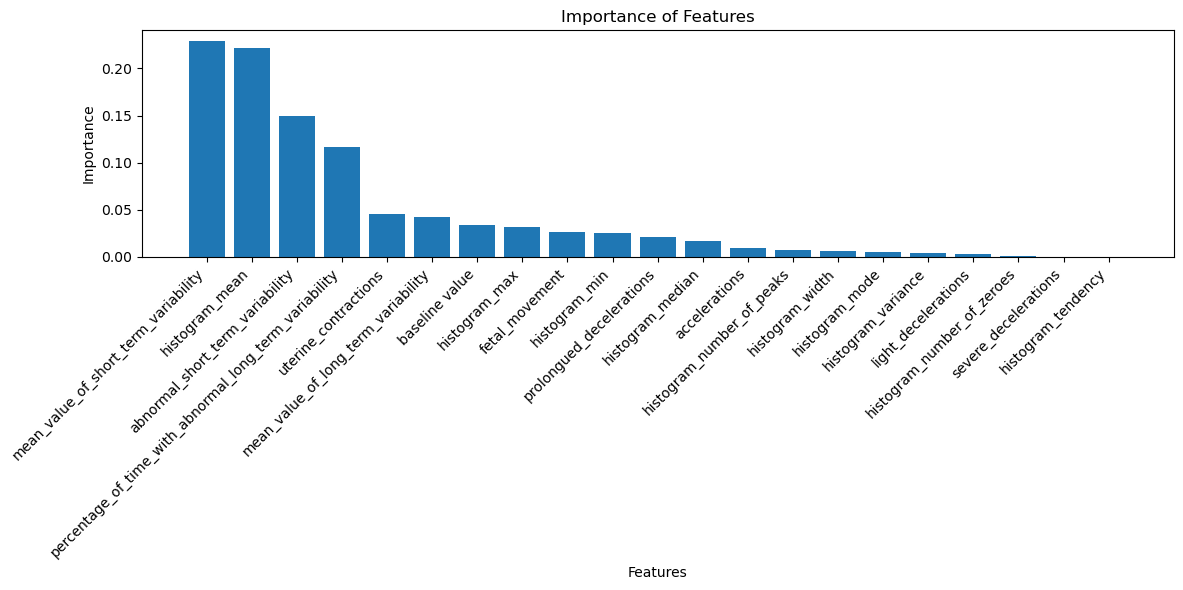

In [45]:
'''
###CODIGO ORIGINAL
# Get feature importances

feature_importances = dt_model.feature_importances_
# Get the names of the features
feature_names = list(X_train.columns)  # Replace with your feature names or column indices
# Sort features based on their importance
sorted_indices = feature_importances.argsort()[::-1]
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_indices], rotation=45, ha='right')
plt.title('Feature Importances: Decision Tree')
plt.show()
'''


# Obtém as importâncias das características
importancias = dt_model.feature_importances_

# Obtém os nomes das características
nomes_caracteristicas = X_train.columns

# Cria um DataFrame com as importâncias e nomes das características
df_importancias = pd.DataFrame({'Feature': nomes_caracteristicas, 'Importance': importancias})

# Ordena o DataFrame pelas importâncias em ordem decrescente
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Plota o histograma das importâncias
plt.figure(figsize=(12, 6))
plt.bar(df_importancias['Feature'], df_importancias['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importance of Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()